# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I, **TEAM JM3**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#intro>Introduction</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Exploratory Data Analysis (EDA)</a>
    
&nbsp;&nbsp;&nbsp;&nbsp;<a href=#twoone>2.1 Data Collection</a>

&nbsp;&nbsp;&nbsp;&nbsp;<a href=#twotwo>2.2. Data Cleaning</a>

&nbsp;&nbsp;&nbsp;&nbsp;<a href=#twothree>2.3. Univariate Analysis</a>

&nbsp;&nbsp;&nbsp;&nbsp;<a href=#twofour>2.4. Multivariate Analysis</a>


<a href=#five>3. Modeling</a>

<a href=#six>4. Model Performance</a>

<a href=#seven>Conclusion</a>

<a href=#app>Appendix</a>

<a id="intro"></a>
## Introduction 
<a href=#cont>Back to Table of Contents</a>

Continuous energy supply is fundamental to fulfilling basic social needs, driving economic growth and fueling human development. This is because energy services have an effect on productivity, health, education, safe water and communication services. 

In recent years, there has been a global concern and sufficient evidence that the use of purely non-renewable sources of energy is not sustainable, thus the urgent need to consider other options; renewable energy sources such as Solar, Wind, Geothermal and Hydro among others.

This project by Team JM3 Digital Solutions Limited, therefore provides the Spanish government with the requisite information on the trends and patterns of the country's renewable sources and fossil fuel energy generation by modeling the shortfall between the two energy sources. 

This will guide the government of Spain in the expansion of its renewable energy resource infrastructure investments.

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

The following packages will be improted for use within out implementation:
1. [Pandas](https://pandas.pydata.org/) - an open source data analysis and manipulation tool, built on top of the Python programming language.
2. [NumPy](https://numpy.org/) - a tool that offers arrays comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more.
3. [Seaborn](https://seaborn.pydata.org/) -a Python data visualization library based on matplotlib.
4. [sklearn](https://scikit-learn.org/) - set of tools for predictive data analysis built on NumPy, SciPy, and matplotlib.
5. [statsmodels](https://www.statsmodels.org/stable/index.html) - provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr

# Libraries for data preparation and model building
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
# Import train/test splitting function from sklearn to split the data into training and testing data
from sklearn.model_selection import train_test_split
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge
#Importing the linear model from Sklearn
from sklearn.linear_model import LinearRegression
# Import metrics module
from sklearn import metrics
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Exploratory Data Analysis (EDA)
<a class="anchor" id="2"></a>
<a href=#cont>Back to Table of Contents</a>

"Exploratory Data Analysis refers to the critical process of performing initial investigations on data ... with the help of summary statistics and graphical representations."<sup>2
    
EDA unearths a lot of important information which can easily be missed, especially with large sets of data. This information is known to help the analysis process in the long run, from revealing insights on how to frame questions to displaying the results. 

Carrying out a thorough EDA will often lead to:

<ul>
<li>Identifying erroneous and missing data</li>
<li>Understanding the basic structure of the data as well as mapping it out</li>
<li>Spotting the most important variables in the dataset</li>
<li>Assessing a hypothesis related to a specific model</li>
<li>Establishing a model that can explain the data using minimum number of variables)</li>
<li>Approximating parameters and computing the margins of error.</li>
</ul>
    
The following are the steps involved in EDA:
<ol type="1">
    <li> <b>Data Collection</b> - The data used here has been obtained from the government of Spain, a reliable source.</li> 
<li> <b>Data Cleaning</b> - this is the removal of anomalies, e.g. unwanted values or variables, from the dataset which can skew the data and thus negatively affect the results.</li> 
<li><b>Univariate Analysis</b> - this is the process of analyzing data of just one variable (a single feature/column). We will implement both graphical or non-graphical techniques.</li> 
<li><b>Multivariate Analysis</b> - This is the process of comparing two or more variables. We will implement both graphical or non-graphical techniques here as well.</li> 
</ol>


<a id="twoone"></a>
### 2.1. Data Collection
<a class="anchor" id="2.1"></a>
<a href=#cont>Back to Table of Contents</a>


The government of Spain has been tracking the different energy sources available within the country out of which, they have provided two data sets in the form of comma-separated values (CSV) files. 

The first, the train dataset, will eventually be used to train the model(s) while the second, the test dataset, will be used to test the performance of the model(s).

The two datasets will be loaded into Python DataFrames using the pandas package.

In [2]:
# loading the data
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv', index_col=0)

<a id="twotwo"></a>
### 2.2. Data Cleaning
<a class="anchor" id="2.2"></a>
<a href=#cont>Back to Table of Contents</a>

Data cleaning will start by checking for, and deleting, any columns that are purely made up of unique values. This is because they are not strongly predictive when it comes to supervised machine learning.

**NOTE:** We will work on cleaning the train dataset first, then replicate all the steps followed to clean the test dataset.

In [3]:
df_train.head() # Checking the content of the uncleaned train data

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
df_test.head() # checking test data

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [5]:
# interate through all train dataset columns 
# to see if the number of rows of unique values
# is equal to the number of rows of the dataset
# if true, the column is purely made of unqiue values
for (columnName, columnData) in df_train.iteritems():
    if len(df_train[columnName].value_counts()) == len(df_train):
        # print name of column with uniue values
        print(columnName)

Unnamed: 0
time


In [6]:
# interate through all test dataset columns 
# to see if the number of rows of unique values
# is equal to the number of rows of the dataset
# if true, the column is purely made of unqiue values
for (columnName, columnData) in df_test.iteritems():
    if len(df_test[columnName].value_counts()) == len(df_test):
        # print name of column with uniue values
        print(columnName)

time


On the train dataset:

1. The **Unnamed: 0** column looks like the index column and will therefore be deleted (dropped).

2. The **time** column, on the other hand has relevant data. A quick glance will reveal that the way it is captured, year-week-day-hour-minute-second, inevitably makes the column unique so it will not be deleted.

On the test dataset, there is an indexing column that will be reset. The other unique column is time which, as explained above, is of value and will not be deleted.

In [7]:
# Drop the Unnamed Column
df_train = df_train.drop('Unnamed: 0', axis=1)

In [8]:
# Let's ensure that we have truely dropped the unnamed column in our train dataset as observed before. View first 2 rows
df_train.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


To avoid using the column names as variable names later on, we will check if some of the columns have white space which will be replaced with an underscore.

In [9]:
# View Column Names for possible White Spaces
df_train.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

In [10]:
df_train.shape

(8763, 48)

From the above observations of the train and test datasets, no column name has white space.

<a id="twothree"></a>
### 2.3. Univariate Analysis
<a class="anchor" id="2.3"></a>
<a href=#cont>Back to Table of Contents</a>

Univariate analysis is arguably the simplest form of statistical analysis<sup>3</sup>. It is the process of analysing one ("uni") variable/ column ("variate"). 

We will start by checking if there are any missing values per column using both graphical and non-graphical techniques.

In [11]:
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [12]:
#check the shape of the dateset
df_train.shape

(8763, 48)

Our Shape looks good;

- For the TRAIN dataset; we have 8763 rows and 48 columns
- And for our TEST dataset; we have 2920 rows and 47 containing all other columns except our dependent variable "load_shortfall_3h"

NEXT we move further to verify the DataTypes and Check for possible missing values PER Column

In [13]:
# summary of dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

Our Outcome Includes; 

1. Identified 3(three) of our Potential features having datatype OBJECT (Categorical)

       a. Valencia_wind_deg --> Covert to Numerical 
       b. Seville_pressure  --> Covert to Numerical 
       c. time              --> Covert to DateTime
       
2. Valencia_pressure  has   6695 non-null   Instead of 8763 (TOTAL MISSING VALUE = 2068)

In [14]:
# look at data statistics
df_train.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


Here we take a look at the summary statistics of the caterogorical variables

In [15]:
# look at data statistics of categorical data
df_train.describe(include=['object'])

,time,Valencia_wind_deg,Seville_pressure
count,8763,8763,8763
unique,8763,10,25
top,2015-01-01 03:00:00,level_1,sp13
freq,1,1072,500


Valencia_wind_deg are Categorized between 
   * Level_1 to Level_10   
   
Seville_pressure are Categorized between
   * sp1  to  sp25

In [16]:
#check the dataset for null values
df_train.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

<AxesSubplot:>

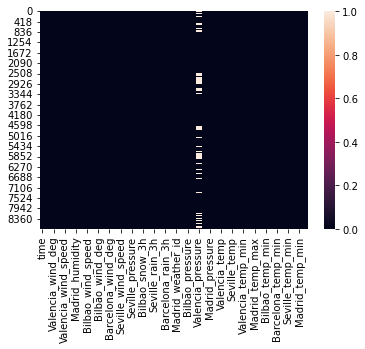

In [17]:
#Plot heatmap of missing values
sns.heatmap(df_train.isnull())

The above heatmap shows how the missing value is spread with in the column (Valencia_pressure)

<a id="twofour"></a>
### 2.4. Multivariate Analysis
<a class="anchor" id="2.4"></a>
<a href=#cont>Back to Table of Contents</a>

Multivariate analysis is the process of analysing more than one type of variable/ column where by multiple measurements are made on each variable/ column and the relationships among the columns, as well as their structures, are established<sup>4</sup>.

The first step will be to check on correlation, that is, find out if there is a mutual relationship or connection between the features and the target variable "load_shortfall_3h" by interpreting the **correlation coefficients**. 

**Correlation coefficients** have values of between *-1* and *1*. A value of *0* means there is no relationship between the variables at all, *-1* means that there is a perfect negative and *1* means that there is a perfect positive correlation. Negative or positive correlation here refers to the type of graph the relationship will produce.

In [18]:
# evaluate correlation - this shows how a given feature value correlates to other features in the dataframe
correlation = df_train.corr()
# evaluating the correlation btw the features and the target variable
correlation['load_shortfall_3h'].sort_values(ascending=False)

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
Barcelona_temp_min      0.195984
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Valencia_pressure       0.086022
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Valencia_snow_3h       -0.021633
Barcelona_rain_3h      -0.024720
Madrid_rain_1h         -0.027159
Seville_rain_1h        -0.031572
Bilbao_snow_3h         -0.031721
Seville_rain_3h        -0.032945
Barcelona_

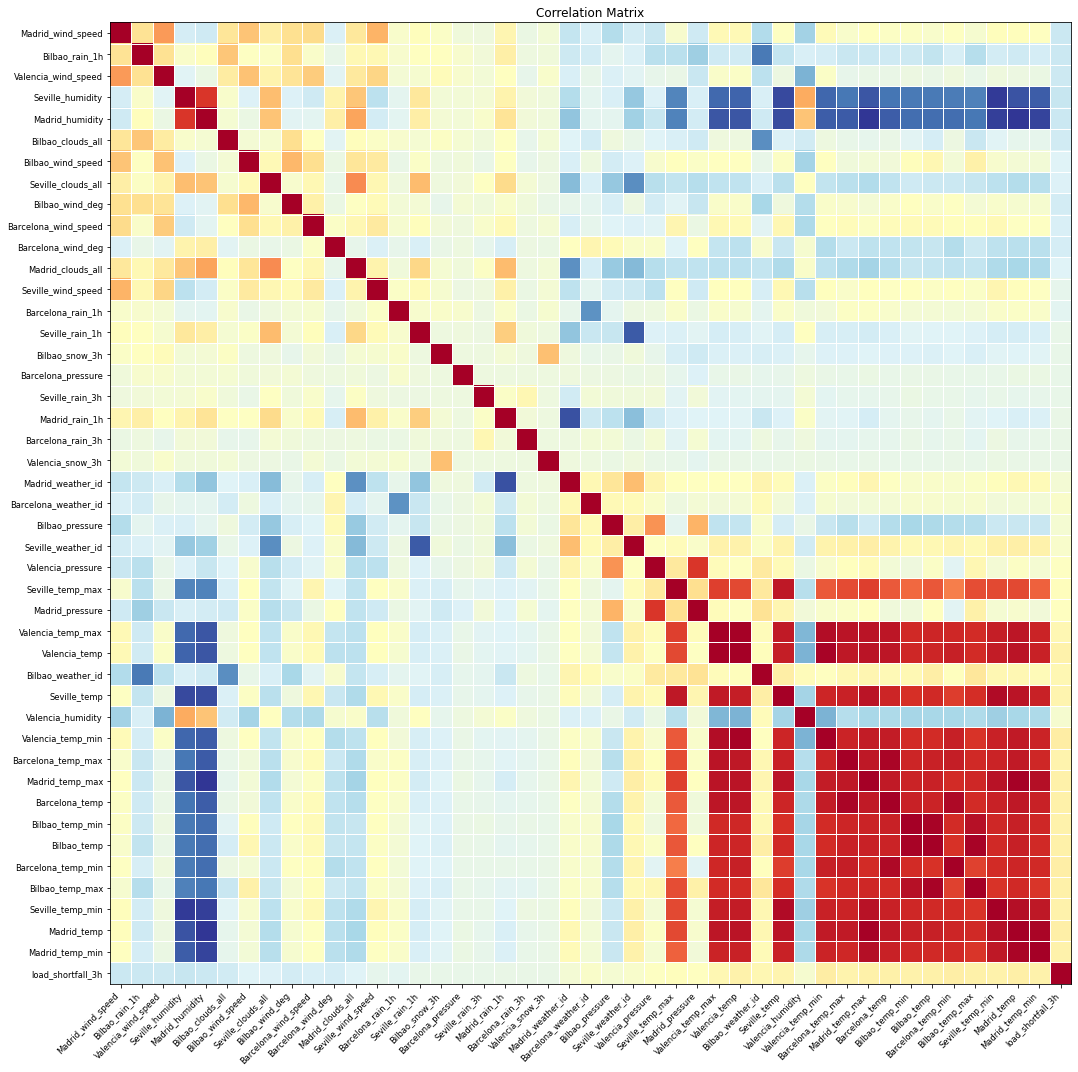

In [19]:
# Visualizing the correlation
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(correlation, xnames =correlation.columns, ax = ax, );

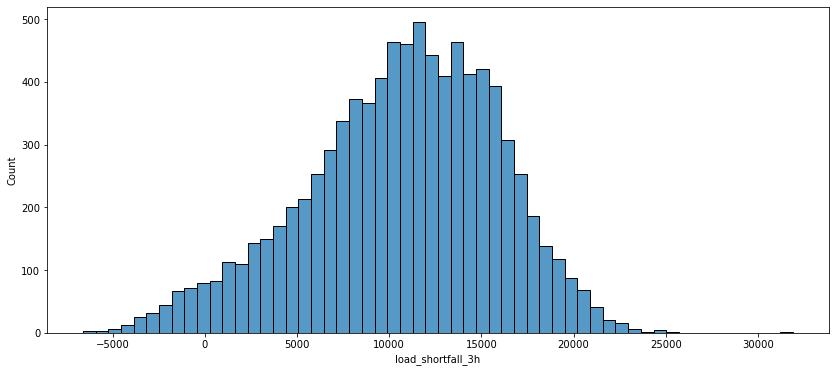

In [20]:
# have a look at feature distributions
fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(df_train['load_shortfall_3h'])
plt.show()

Not all machine learning models can interpreted the *datetime* data type. For this reason, we will convert the **time** column into a numeric by further breaking it down to different column to represent the year, month, day, hour, minute and second.

In [21]:
#converting the time column to datetime data type
df_train['time'] = pd.to_datetime(df_train['time'])

In [22]:
#creating the temporal features 
df_train['Day_of_Week'] = df_train['time'].dt.dayofweek
df_train['Week_of_Year'] = df_train['time'].dt.weekofyear
df_train['Day_of_Year'] = df_train['time'].dt.dayofyear
df_train['Month_of_Year'] = pd.DatetimeIndex(df_train['time']).month #Actual Month
df_train['Year'] = pd.DatetimeIndex(df_train['time']).year #Actual Year
df_train['Day_of_Month'] = pd.DatetimeIndex(df_train['time']).day #Day of month
df_train['Hour_of_Day'] = pd.DatetimeIndex(df_train['time']).hour #Hour of day
df_train['Hour_of_Year'] = (df_train['time'].dt.dayofyear )* 24 + df_train['time'].dt.hour #Hour of year -1
df_train['Hour_of_Week'] = (df_train['time'].dt.dayofweek ) * 24 +  df_train['time'].dt.hour #Hour of week
#df_train = df_train.drop('time', axis=1)
df_train.head()

C:\Users\PAULAB~1\AppData\Local\Temp/ipykernel_21216/3067928506.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train['Week_of_Year'] = df_train['time'].dt.weekofyear


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,load_shortfall_3h,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,6715.666667,3,1,1,1,2015,1,3,27,75
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,4171.666667,3,1,1,1,2015,1,6,30,78
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,4274.666667,3,1,1,1,2015,1,9,33,81
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,5075.666667,3,1,1,1,2015,1,12,36,84
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,6620.666667,3,1,1,1,2015,1,15,39,87


In [23]:
#selecting and creating the dummy variables for the categorical features
cat_var = df_train[['Valencia_wind_deg', 'Seville_pressure']]
cat_var_dum = pd.get_dummies(cat_var, drop_first=True)
cat_var_dum.head()

,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [24]:
time = df_train[['time']]

In [25]:
#count the number of null values in each column
df_train['Valencia_pressure'].isnull().sum()

2068

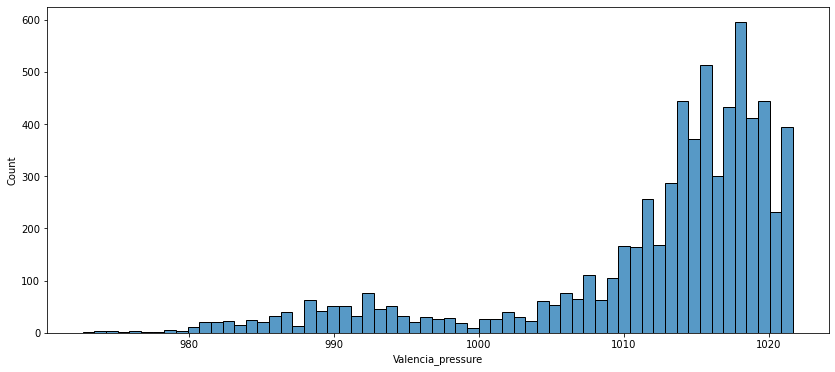

In [26]:
#histogram of the feature with the missing value (Valencia_pressure)
fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(df_train['Valencia_pressure'], ax=ax);

In [27]:
#Now let's copy the training data to a new dataframe
df2 = df_train.copy()

In [28]:
#dropping the column with Object data type - a technique to improve our model
df2 = df2.drop(['time', 'Valencia_wind_deg', 'Seville_pressure'], axis=1)

In [29]:
# Creating a dataframe of our response or target variable
response_y = df2['load_shortfall_3h']

In [30]:
df2 = df2.drop('load_shortfall_3h', axis=1)
df2.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,265.938000,3,1,1,1,2015,1,3,27,75
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,266.386667,3,1,1,1,2015,1,6,30,78
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,272.708667,3,1,1,1,2015,1,9,33,81
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,281.895219,3,1,1,1,2015,1,12,36,84
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,280.678437,3,1,1,1,2015,1,15,39,87


Here the StandarScaler is used to resize the features of the dataframe

In [31]:
# create scaler object
scaler = StandardScaler()

In [32]:
# convert the scaled predictor values into a dataframe
df2 = pd.DataFrame(scaler.fit_transform(df2),columns = df2.columns)
df2.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,-2.309892,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-1.090901,-1.731947,-0.157423
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,-2.261154,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.654451,-1.730761,-0.095526
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,-1.574407,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.218001,-1.729575,-0.033629
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,-0.576488,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.218449,-1.728389,0.028268
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,-0.708665,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.654899,-1.727204,0.090165


Here we use the K-nearest neighbours (KNN) Algorithm to Impute the missing valuse, KNN calculates the mean of the neighbours based on the number of neighbours specified in side pramenter here we are using (5) as the number of neighbours

In [33]:
# feature engineering on existing features
# This also imputes missing values of the features
imputer = KNNImputer(n_neighbors=6)
df2 = pd.DataFrame(imputer.fit_transform(df2),columns = df2.columns)

In [34]:
df2.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,-2.309892,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-1.090901,-1.731947,-0.157423
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,-2.261154,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.654451,-1.730761,-0.095526
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,-1.574407,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,-0.218001,-1.729575,-0.033629
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,-0.576488,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.218449,-1.728389,0.028268
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,-0.708665,-0.00274,-1.709703,-1.728991,-1.602429,-1.226179,-1.675368,0.654899,-1.727204,0.090165


In [35]:
#df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [36]:
#cancatenating the df2 with the dummy categorical df2
df2 = pd.concat([df2, cat_var_dum], axis=1)
df2.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,0,0,1,0,0,0,0,0,0,0
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,0,0,1,0,0,0,0,0,0,0
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,0,0,1,0,0,0,0,0,0,0
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,0,0,1,0,0,0,0,0,0,0
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,0,0,1,0,0,0,0,0,0,0


In [37]:
#Rearranging the columns
column_titles = [i for i in df2.columns]
df2 = df2.reindex(columns = column_titles)

In [38]:
df2.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,0,0,1,0,0,0,0,0,0,0
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,0,0,1,0,0,0,0,0,0,0
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,0,0,1,0,0,0,0,0,0,0
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,0,0,1,0,0,0,0,0,0,0
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,0,0,1,0,0,0,0,0,0,0


In [39]:
# Drop All temp_max and temp_min of all the cities to avoid Multicollinearity
df2 = df2.drop(['Seville_temp_max','Valencia_temp_max','Barcelona_temp_max','Madrid_temp_max','Bilbao_temp_max','Seville_temp_min','Valencia_temp_min','Barcelona_temp_min','Madrid_temp_min','Bilbao_temp_min'],axis=1)

In [40]:
# Now, let's drop the redundant time variables
df2 = df2.drop(['Week_of_Year','Month_of_Year', 'Day_of_Week', 'Year', 'Hour_of_Year'], axis=1)

### Cleaning the test dataframe and handling the missing values

In [41]:
#copy the test df to a new df
test_df = df_test.copy()

In [42]:
test_df['time'] = pd.to_datetime(test_df['time'])

In [43]:
test_df['Day_of_Week'] = test_df['time'].dt.dayofweek
test_df['Week_of_Year'] = test_df['time'].dt.weekofyear
test_df['Day_of_Year'] = test_df['time'].dt.dayofyear
test_df['Month_of_Year'] = pd.DatetimeIndex(test_df['time']).month #Actual Month
test_df['Year'] = pd.DatetimeIndex(test_df['time']).year #Actual Year
test_df['Day_of_Month'] = pd.DatetimeIndex(test_df['time']).day #Day of month
test_df['Hour_of_Day'] = pd.DatetimeIndex(test_df['time']).hour #Hour of day
test_df['Hour_of_Year'] = (test_df['time'].dt.dayofyear )* 24 + test_df['time'].dt.hour #Hour of year -1
test_df['Hour_of_Week'] = (test_df['time'].dt.dayofweek ) * 24 +  test_df['time'].dt.hour #Hour of week
#df_train = df_train.drop('time', axis=1)
test_df.head()

C:\Users\PAULAB~1\AppData\Local\Temp/ipykernel_21216/858496451.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test_df['Week_of_Year'] = test_df['time'].dt.weekofyear


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,279.150000,0,1,1,1,2018,1,0,24,0
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,278.150000,0,1,1,1,2018,1,3,27,3
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,276.150000,0,1,1,1,2018,1,6,30,6
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,274.483333,0,1,1,1,2018,1,9,33,9
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,280.150000,0,1,1,1,2018,1,12,36,12


In [44]:
test_time = test_df[['time']]

In [45]:
test_time

,time
8763,2018-01-01 00:00:00
8764,2018-01-01 03:00:00
8765,2018-01-01 06:00:00
8766,2018-01-01 09:00:00
8767,2018-01-01 12:00:00
...,...
11678,2018-12-31 09:00:00
11679,2018-12-31 12:00:00
11680,2018-12-31 15:00:00
11681,2018-12-31 18:00:00


In [46]:
test_time = test_time.reset_index().drop(["index"], axis=1)

In [47]:
test_time

,time
0,2018-01-01 00:00:00
1,2018-01-01 03:00:00
2,2018-01-01 06:00:00
3,2018-01-01 09:00:00
4,2018-01-01 12:00:00
...,...
2915,2018-12-31 09:00:00
2916,2018-12-31 12:00:00
2917,2018-12-31 15:00:00
2918,2018-12-31 18:00:00


In [48]:
#drop the categorical columns 
test_df = test_df.drop(['time', 'Valencia_wind_deg', 'Seville_pressure' ], axis=1)

In [49]:
#sacling the dataFrame using the StandarScalar
test_df = pd.DataFrame(scaler.fit_transform(test_df), columns = test_df.columns)

In [50]:
#Imputing the missing values using Knn Imputer
test_df = pd.DataFrame(imputer.fit_transform(test_df), columns = test_df.columns)

In [51]:
test_df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,Day_of_Week,Week_of_Year,Day_of_Year,Month_of_Year,Year,Day_of_Month,Hour_of_Day,Hour_of_Year,Hour_of_Week
0,1.432590,-0.440268,0.995600,0.964514,0.360022,-0.766227,0.433023,-0.612116,0.314013,0.911814,...,-0.855293,-1.493348,-1.690057,-1.727312,-1.602745,0.0,-1.673503,-1.527525,-1.731458,-1.694498
1,1.244747,-0.440268,1.162600,1.061565,0.636255,-1.422372,0.835964,-0.612116,-0.197584,1.322013,...,-0.969818,-1.493348,-1.690057,-1.727312,-1.602745,0.0,-1.673503,-1.091089,-1.730271,-1.632732
2,-0.070152,-0.440268,0.995600,1.061565,1.119662,-1.422372,0.030083,-0.348454,-0.334010,0.911814,...,-1.198870,-1.493348,-1.690057,-1.727312,-1.602745,0.0,-1.673503,-0.654654,-1.729085,-1.570966
3,0.117691,-0.440268,1.162600,1.271842,0.829617,-0.547512,2.044786,-0.348454,0.348120,-0.113683,...,-1.389746,-1.493348,-1.690057,-1.727312,-1.602745,0.0,-1.673503,-0.218218,-1.727899,-1.509200
4,0.869062,-0.440268,2.832609,-0.086869,0.056166,-0.547512,5.066840,-0.612116,0.723291,1.322013,...,-0.740767,-1.493348,-1.690057,-1.727312,-1.602745,0.0,-1.673503,0.218218,-1.726712,-1.447435


In [52]:
#creating dummies for test categorical variables
cat_var = df_test[['Valencia_wind_deg', 'Seville_pressure']]
test_dummies = pd.get_dummies(cat_var, drop_first=True)
test_dummies.head()

,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
8763,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8764,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8765,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8766,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8767,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Resetting the index to start from zero not (8763), which will make an additional column called index, so the index column is being drop here: this is done to make the work of concatenation easrie with out having issues with NaN

In [53]:
#resetting the index and droping the index column
test_dummies = test_dummies.reset_index().drop(["index"], axis=1)
test_dummies.head()

,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,Seville_pressure_sp10,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
#concatenating the test dataframe and the test_dummies dataframe
test_df = pd.concat([test_df, test_dummies], axis=1)
test_df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,1.432590,-0.440268,0.995600,0.964514,0.360022,-0.766227,0.433023,-0.612116,0.314013,0.911814,...,0,0,1,0,0,0,0,0,0,0
1,1.244747,-0.440268,1.162600,1.061565,0.636255,-1.422372,0.835964,-0.612116,-0.197584,1.322013,...,0,0,1,0,0,0,0,0,0,0
2,-0.070152,-0.440268,0.995600,1.061565,1.119662,-1.422372,0.030083,-0.348454,-0.334010,0.911814,...,0,0,1,0,0,0,0,0,0,0
3,0.117691,-0.440268,1.162600,1.271842,0.829617,-0.547512,2.044786,-0.348454,0.348120,-0.113683,...,0,0,1,0,0,0,0,0,0,0
4,0.869062,-0.440268,2.832609,-0.086869,0.056166,-0.547512,5.066840,-0.612116,0.723291,1.322013,...,0,0,1,0,0,0,0,0,0,0


In [55]:
# DROPPING REDUNDANT TIME VARIABLES
test_df = test_df.drop(['Week_of_Year','Month_of_Year', 'Day_of_Week', 'Year', 'Hour_of_Year'], axis=1)

In [56]:
# Drop All temp_max and temp_min all the cities to avoid Multicollinearity
test_df = test_df.drop(['Seville_temp_max','Valencia_temp_max','Barcelona_temp_max','Madrid_temp_max','Bilbao_temp_max','Seville_temp_min','Valencia_temp_min','Barcelona_temp_min','Madrid_temp_min','Bilbao_temp_min'],axis=1)


<a id="five"></a>
## 3. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


#### A Brief Introduction of XGBoost Machine Learning Model

The XGBoost library implements the gradient boosting decision tree algorithm.

This algorithm is also known as gradient boosting, multiple additive regression trees, stochastic gradient boosting or gradient boosting machines.

**Boosting is an ensemble technique** where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. A popular example is the AdaBoost algorithm that weights data points that are hard to predict.

Gradient boosting is an approach where new models are created that **predict the residuals or errors** of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

This approach supports both regression and classification predictive modeling problems.

**To use the XGBoost, kindly install the library using ..... "pip install xgboost" ..... on Conda Prompt**

In [57]:
import xgboost as xgb

In [58]:
data_dmatrix = xgb.DMatrix(data=df2,label=response_y)

In [59]:
#creating the features and target variables
X = df2
y = response_y

In [60]:
# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)


In [61]:
# create one or more ML models

# Create linear model
lm = LinearRegression()

#create Xgboost
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.1,
                max_depth = 5, subsample = 0.7, alpha = 20, n_estimators = 100)

In [62]:
# Fit the Ml model
lm.fit(x_train, y_train)

xg_reg.fit(x_train, y_train)

XGBRegressor(alpha=20, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=20, ...)

In [63]:
# evaluate our selected ML models
train_lm = lm.predict(x_train)
xgboost = xg_reg.predict(x_train)

print('linear Model :', metrics.mean_squared_error(y_train, train_lm))
print('Xgboost Model :', metrics.mean_squared_error(y_train, xgboost))

linear Model : 22543762.95953021
Xgboost Model : 4906199.818129918


<a id="six"></a>
## 4. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



In [64]:
# Compare model performance
test_lm = lm.predict(x_test)
test_xgboost = xg_reg.predict(x_test)

print('linear Model :', metrics.mean_squared_error(y_test, test_lm))
print("Xgboost: ", metrics.mean_squared_error(y_test, test_xgboost))


linear Model : 23085374.82402318
Xgboost:  13886754.58592376


In [65]:
new_prediction = xg_reg.predict(test_df)

In [66]:
#test_df = test_df.drop('load_shortfall_3h', axis=1)
new_prediction

array([ 6832.12  ,  2390.1204,  2771.9375, ..., 13759.705 , 14030.099 ,
       15509.206 ], dtype=float32)

In [67]:
test_df['load_shortfall_3h'] = new_prediction

In [68]:
data = test_time
data

,time
0,2018-01-01 00:00:00
1,2018-01-01 03:00:00
2,2018-01-01 06:00:00
3,2018-01-01 09:00:00
4,2018-01-01 12:00:00
...,...
2915,2018-12-31 09:00:00
2916,2018-12-31 12:00:00
2917,2018-12-31 15:00:00
2918,2018-12-31 18:00:00


In [69]:
data = pd.concat([data, test_df[['load_shortfall_3h']]], axis=1)

In [70]:
data.to_csv('Team JM3 Model Sub', header=True, index=False)

In [71]:
import pickle

model_save_path = "new_test_run.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(xg_reg,file)

<a id="seven"></a>
## Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Our model solution produced results that were very close to the original targeted variable in the train set. It took care of outlier and made sure the results were of above average quality. We are therefore confident that our solution can successfully be used to predict the renewable energy shortfall of Spain.

We however recommend that further testing be done on the other machine learning models that we did not cover due to time limitations so establish if there could be a better solution. We also recommend that the API be developed further such that it can take in arbitrary data that can be used o make future predictions

 <a id="app"></a>
 ## Appendix

<a href=#cont>Back to Table of Contents</a>

1. Problem statement: https://www.kaggle.com/c/spain-electricity-shortfall-challenge/overview
2. What is Exploratory Data Analysis?: https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
3. Statistics How To: https://www.statisticshowto.com/univariate/
4. Multivariate analysis: an overview:https://s4be.cochrane.org/blog/2021/09/09/multivariate-analysis-an-overview/#:~:text=Multivariate%20analysis%20is%20defined%20as,and%20their%20structure%20are%20important
5. :K-Nearest Neighbor(KNN) Algorithm for Machine Learning: https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning